In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sys
import os
sys.path.append(os.path.abspath('../..'))
from project_paths import PROJECT_ROOT
from file_handler import HistoryHandler
from functions import compute_RE, get_timing_info
from Paper.figure_scripts import common

In [2]:
L = 64
alpha = 1
arch = f"RBM_alpha{alpha}"
n_dim = 1
PBC = True
dtype_labels = [None, "f32", "f16", "bf16"]
model_labels = ["TFIM"]
model_params = [{"J": 1, "h": 0.5}]

n_samples = 2**17
n_chains = 2**15

folder = f"{PROJECT_ROOT}Data/History/Condition_number/LPE/"

In [3]:
def load(which):
    condition_number = [[None for _ in dtype_labels] for _ in model_labels]

    for m in range(len(model_labels)):
        for d in range(len(dtype_labels)):
            if dtype_labels[d] is not None:
                _folder = f"{which}/{dtype_labels[d]}/"
            else:
                _folder = "" 
            name = f"{folder}{_folder}MC/"
            hh = HistoryHandler(name, model_labels[m], arch, L, PBC, n_dim, **model_params[m], n_samples=n_samples, n_chains=n_chains)
            df = hh.load_history()

            condition_number[m][d] = df["Condition_number"].to_numpy()

    return condition_number

condition_number = np.array(load("Both")).squeeze()
dtype_labels[0] = "f64"

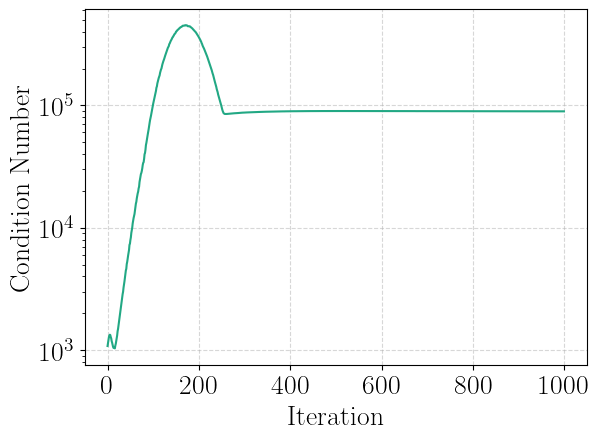

In [4]:
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(dtype_labels)))
plt.plot(np.arange(len(condition_number[0][:1000])), condition_number[0][:1000], color=colors[2])
plt.xlabel('Iteration')
plt.ylabel('Condition Number')

plt.grid(alpha=0.5, ls='--')
plt.yscale('log')
plt.tight_layout()
plt.savefig('figures/condition_number.pdf')
plt.show()